In [26]:
%matplotlib inline

import collections
import itertools
import json

from brewer2mpl import qualitative
from matplotlib import pyplot, rcParams
import pandas

In [81]:
with open('data/info.json') as f:
    metadata = json.load(f)

metadata['patch']

'7.0.0.15590'

In [67]:
with open('data/cards.json') as f:
    data = json.load(f)
    
# This yields an iterator that returns one card at a time.
cards = itertools.chain.from_iterable(data.values())
series = [pandas.Series(card) for card in cards]
cards = pandas.concat(series, axis=1, join='outer').T.set_index('cardId')
cards.head()

,artist,attack,cardSet,classes,collectible,cost,durability,elite,faction,flavor,...,imgGold,locale,mechanics,multiClassGroup,name,playerClass,race,rarity,text,type
cardId,,,,,,,,,,,,,,,,,,,,,
TB_MechWar_Boss1,NaN,NaN,Tavern Brawl,NaN,NaN,NaN,NaN,NaN,Neutral,NaN,...,http://wow.zamimg.com/images/hearthstone/cards...,enUS,NaN,NaN,Annoy-o-Tron,Neutral,NaN,Free,NaN,Hero
TB_FactionWar_Hero_Annoy_Update,NaN,NaN,Tavern Brawl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://wow.zamimg.com/images/hearthstone/cards...,enUS,NaN,NaN,Annoy-o-Tron Prime,Neutral,NaN,NaN,NaN,Hero
TB_SPT_DPromoSecre8e,NaN,NaN,Tavern Brawl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,enUS,NaN,NaN,Assassin's Stealth,Neutral,NaN,NaN,<b>Stealth</b>.,Enchantment
TB_006e,NaN,NaN,Tavern Brawl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,enUS,NaN,NaN,Big Banana,Neutral,NaN,NaN,Has +2/+2.,Enchantment
KAR_a10_Boss2H_TB,NaN,0,Tavern Brawl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://wow.zamimg.com/images/hearthstone/cards...,enUS,NaN,NaN,Black King,Neutral,NaN,NaN,NaN,Hero


## Mana Curve by Card Set

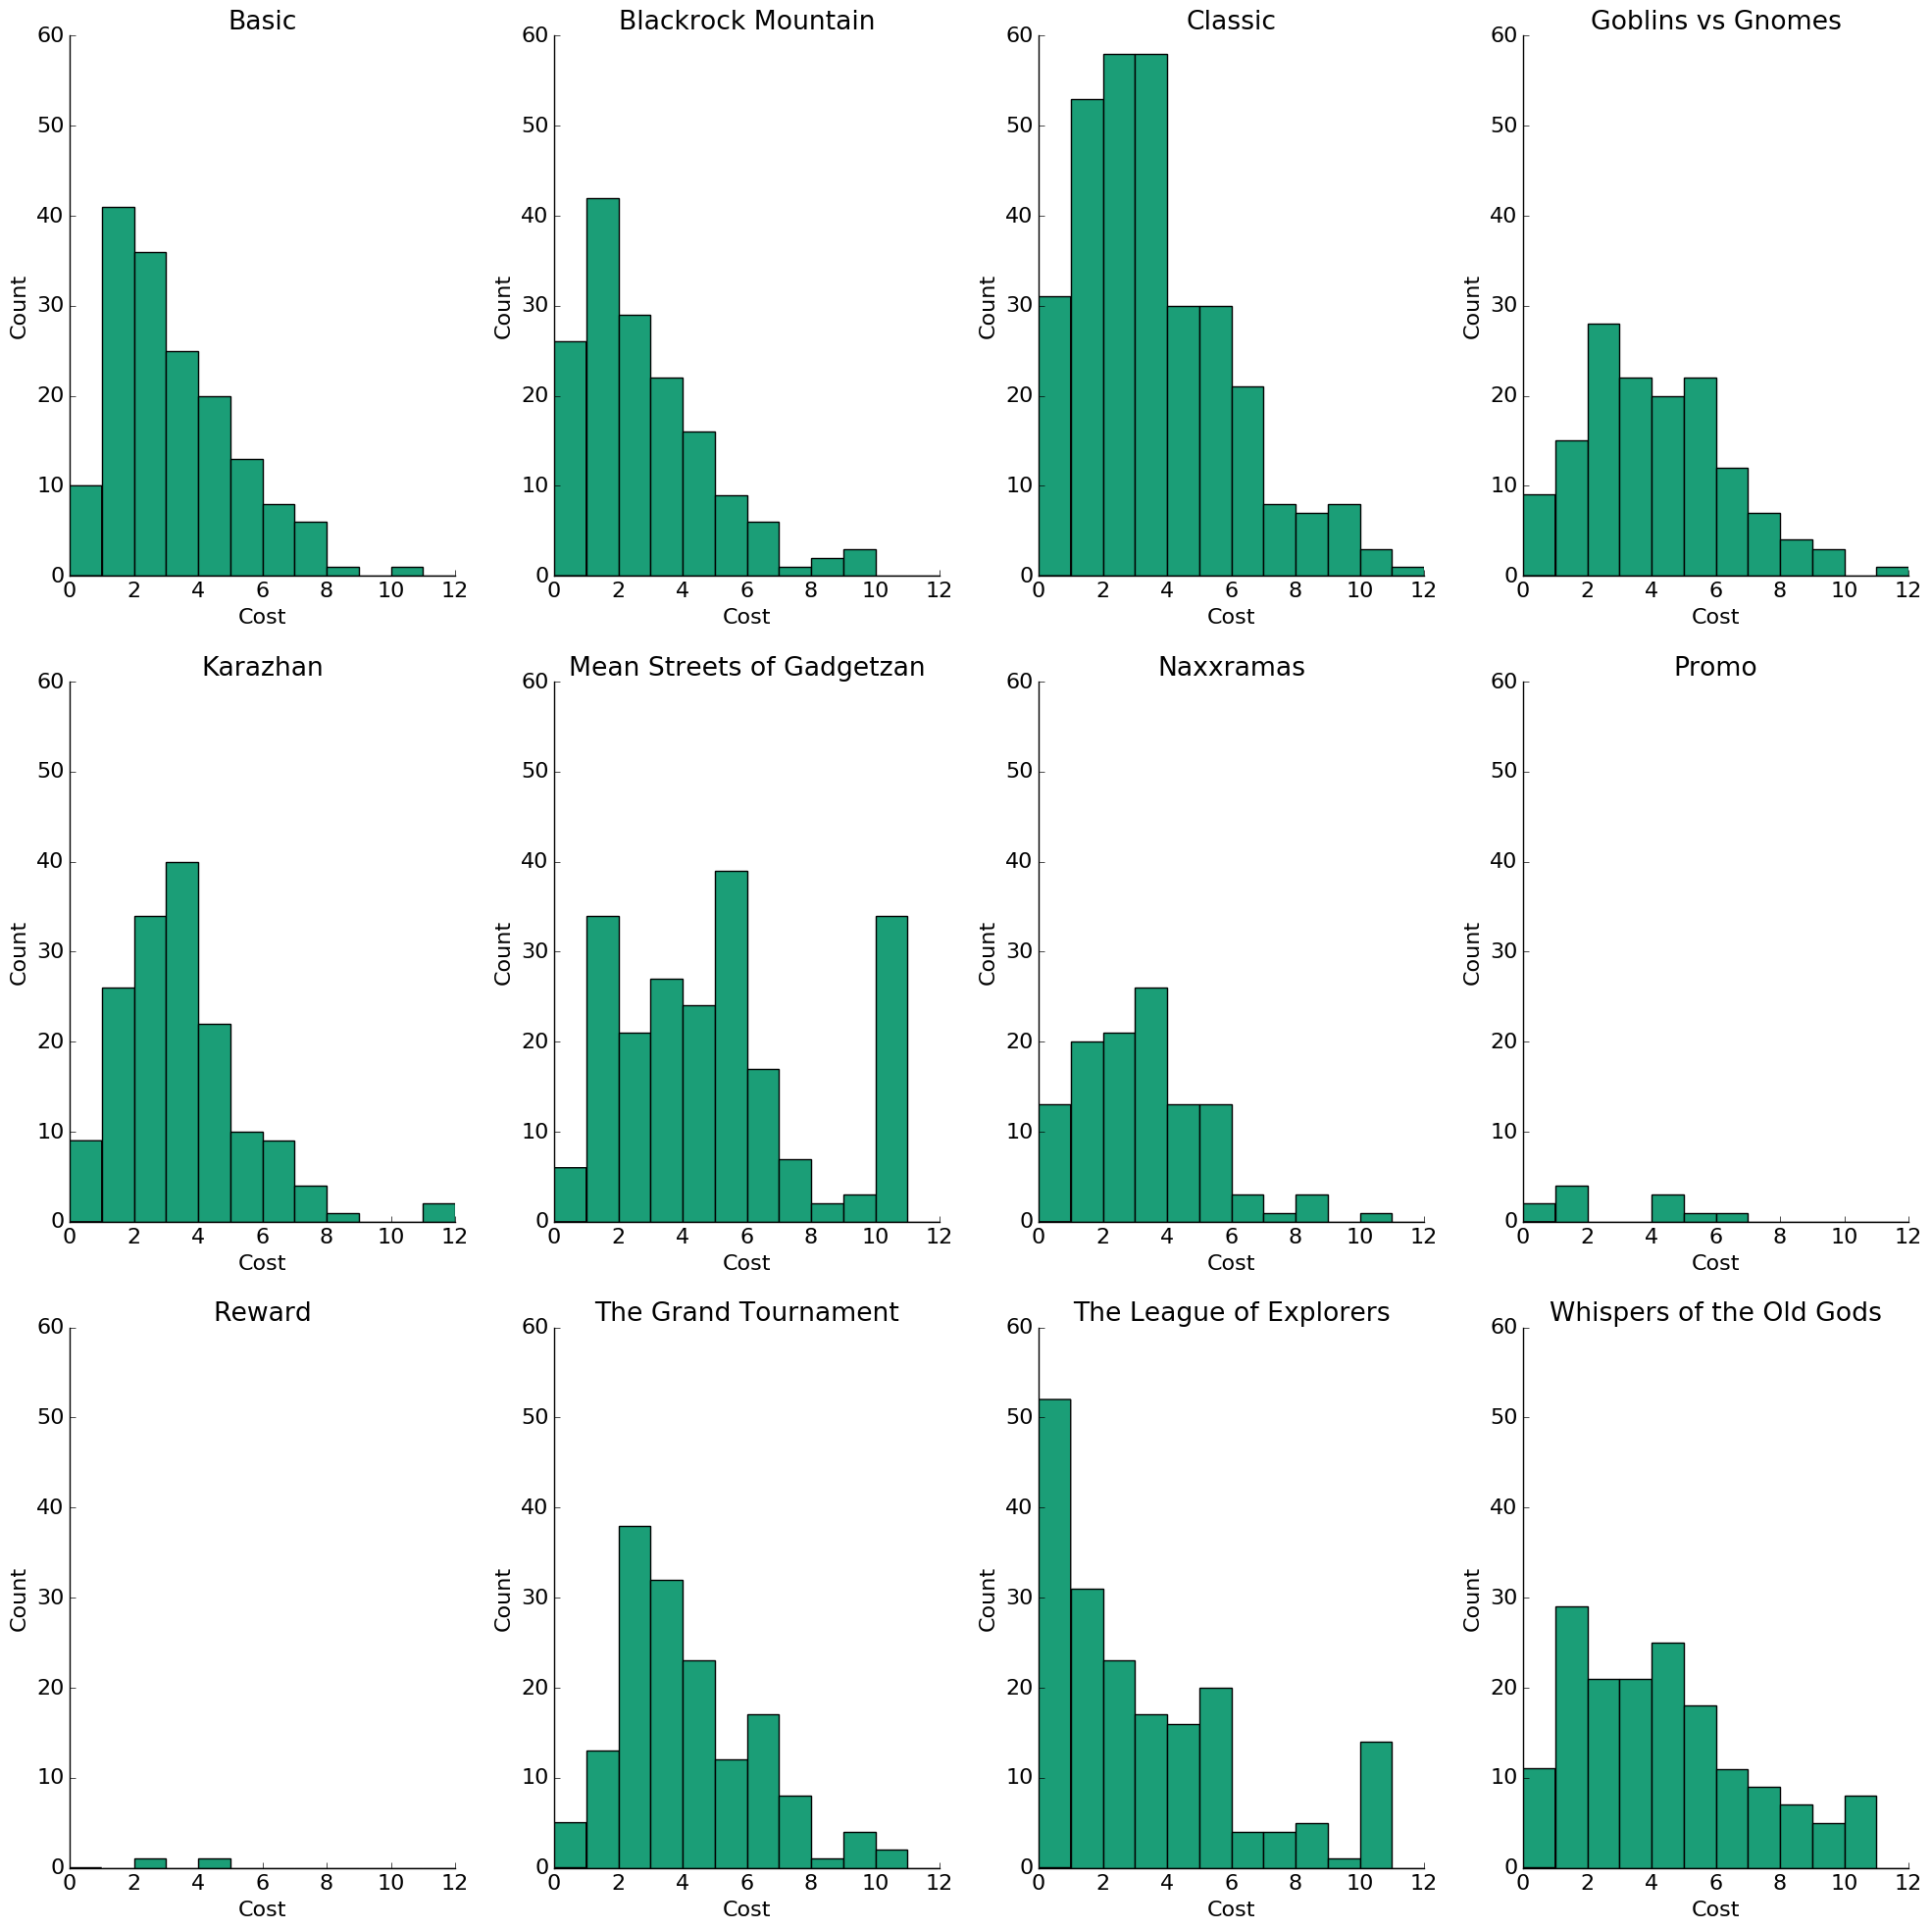

In [76]:
rcParams.update({
    'figure.figsize': (20, 20),
    'figure.dpi': 300,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'font.size': 16,
    'patch.edgecolor': 'black',
})


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks.
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn.
    """
    axes = axes or pyplot.gca()
    borders = {
        'bottom': axes.xaxis.tick_bottom,
        'left': axes.yaxis.tick_left,
        'right': axes.yaxis.tick_right,
        'top': axes.xaxis.tick_top,
    }

    # Turn off all ticks.
    axes.yaxis.set_ticks_position('none')
    axes.xaxis.set_ticks_position('none')

    for border, ticks in borders.items():
        is_visible = vars()[border]
        axes.spines[border].set_visible(is_visible)
        
        if is_visible:
            # Make requested ticks visible.
            ticks()


rows = 3
columns = 4
plot = 1

colors = qualitative.Dark2[7].mpl_colors

for card_set, group in cards.groupby('cardSet'):
    if card_set in metadata['wild']:
        axes = pyplot.subplot(rows, columns, plot)
        group = group.dropna(subset=['cost'])
        axes.hist(group['cost'], range=(0,12), bins=12, color=colors[0])

        axes.set_title(card_set)
        
        axes.set_xlabel('Cost')
        axes.set_ylabel('Count')

        axes.set_ylim(0, 60)
        
        remove_border()
        plot += 1

pyplot.tight_layout()

In [89]:
cards[cards['cardSet'] == 'Mean Streets of Gadgetzan'].dropna(subset=['mechanics'])[['name', 'mechanics']]

,name,mechanics
cardId,,
CFM_687e,Free Spell,[{'name': 'OneTurnEffect'}]
CFM_699e,Seadevil Enchant,[{'name': 'OneTurnEffect'}]
CFM_661e,Shrunk,[{'name': 'OneTurnEffect'}]
CFM_021,Freezing Potion,[{'name': 'Freeze'}]
CFM_602a,Jade Idol,[{'name': 'Jade Golem'}]
CFM_315,Alleycat,[{'name': 'Battlecry'}]
CFM_621t4,Felbloom,[{'name': 'AffectedBySpellPower'}]
CFM_313,Finders Keepers,"[{'name': 'Overload'}, {'name': 'Discover'}]"
CFM_800,Getaway Kodo,[{'name': 'Secret'}]
